このColabノートブックでは、第5回講義資料の「不偏と標本の差（不偏標準偏差と標本標準偏差の差）」に掲載したグラフを作るためのRプログラムを紹介します。

注意：乱数は、プログラムの実行毎に異なるため、講義資料とまったく同じグラフにはなりません。しかし、サンプルサイズが大きくなると「不偏標準偏差と標本標準偏差の違いは小さくなる」という本質は変わりません。

まず、準備をします。

In [2]:
rm(list=ls())
sampleSize <- 300

sampleSD <- function(x) 
  {
  sampleVar <- var(x)*( (length(x)-1)/length(x) )
  sampleStDev <- sqrt(sampleVar)
  return(sampleStDev)
  }

normDistData <- rnorm(sampleSize, mean=0, sd=1)

forrange <- seq(from=10, to=sampleSize, by=50)
resArray <- array(NA, c(length(forrange), 2))

次にプログラムで以下の作業を行います。

1.   乱数の最初の50個を取り出して不偏標準偏差・標本標準偏差を計算する
2.   乱数の最初の100個を取り出して不偏標準偏差・標本標準偏差を計算する
3.   乱数の最初の150個を取り出して不偏標準偏差・標本標準偏差を計算する
（以下、50個ずつ増やして、300個まで続ける）

In [3]:
for (ii in 1:length(forrange))
{
  dataEnd <- forrange[ii]
  cat("End:", dataEnd, "\n")
  tmpData <- normDistData[1:dataEnd]
  cat("Length:", length(tmpData), "\n")
  resArray[ii, 1] <- sd(tmpData)
  resArray[ii, 2] <- sampleSD(tmpData)
}

End: 10 
Length: 10 
End: 60 
Length: 60 
End: 110 
Length: 110 
End: 160 
Length: 160 
End: 210 
Length: 210 
End: 260 
Length: 260 


最後に生成したデータをプロットして、不偏標準偏差と標本標準偏差がどのくらい差があるか確認してみましょう。

なお、以下ではプロットに凡例をつけるlegend()という関数を使っていますが、Colabが日本語に対応していないため、不偏標準偏差は"Fuhen"、標本標準偏差は"Hyohon"と表示します。

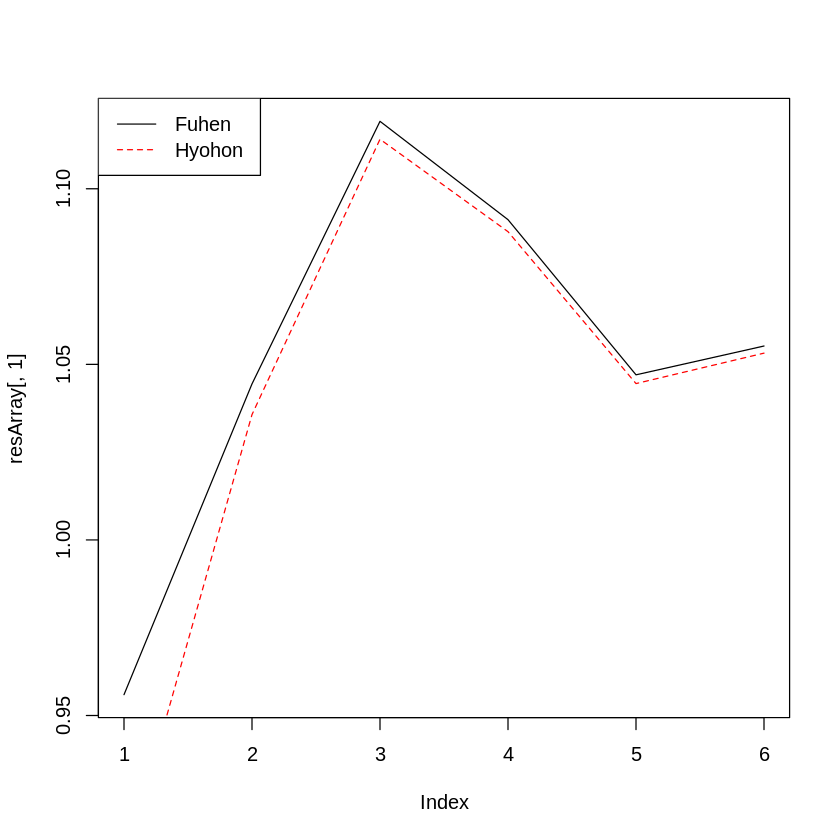

In [7]:
plot(resArray[,1], type="l", lty=1)
lines(resArray[,2], col="red", type="l",lty=2)
legend("topleft", legend = c("Fuhen", "Hyohon"), 
col=c("black", "red"), lty=c(1,2))